In [1]:
import glob 
from pathlib import Path
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [23]:
PATH = r'/Users/peaceforlives/Documents/Projects/covid_tweets/results/finalselection/'
data = pd.read_pickle(PATH+'data_predicted.pkl')
data_docs = pd.read_pickle(PATH+'full_data.pkl')

In [24]:
df = data.copy()
df.loc[df['bullying_trace']=='no', 'bullying_trace'] = 'NA'
df.set_index(pd.to_datetime(df['created_at']), inplace=True)
df.drop('created_at', inplace=True, axis=1)
df.tail()

,id,source,geo,coordinates,place,lang,full_tweet,timezone,localtime,state,bullying_trace,bullying_role,form_of_bullying,bullying_post_type
created_at,,,,,,,,,,,,,,
2020-04-01 03:43:12+00:00,1245194981746278400,"<a href=""https://www.socialjukebox.com"" rel=""n...",None,None,None,en,the outbreak of #coronavirus is no excuse for ...,None,None,None,yes,reporter,xenophobia,report
2020-04-01 03:46:51+00:00,1245195899120136192,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,en,"we welcomed mr. xi with open arms &amp; mind, ...",None,None,None,NA,NaN,NaN,NaN
2020-04-01 03:51:42+00:00,1245197120434507776,"<a href=""http://twitter.com/download/android"" ...",None,None,None,en,question of the day: if i'm making hentai fan-...,None,None,None,yes,reporter,general,report
2020-04-01 03:53:22+00:00,1245197536622792704,"<a href=""http://twitter.com/download/android"" ...",None,None,None,en,last week they were being clapped \nnow it's b...,None,None,None,yes,reporter,general,report
2020-04-01 03:58:20+00:00,1245198788899168256,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,en,area dipshit tries to bully virus,None,None,None,NA,NaN,NaN,NaN


In [13]:
df['date'] = [i.date() for i in df.index]
df['datestr'] = [i.date().strftime('%Y-%m-%d') for i in df.index]

df['time'] = [i.time() for i in df.index]
df['hour'] = [i.hour for i in df.index]
df['day'] = [i.day for i in df.index]
df['wkday'] = [i.weekday() for i in df.index]
df['month'] = [i.month for i in df.index]

df = df[df.datestr != '2020-04-01']
# df = df[df.datestr != '2020-02-21']

n_tweets_df = df['date'].groupby(df['date']).count()  # total by date

In [14]:
b_trace = df[df['bullying_trace']=='yes']
# b_trace = geo[geo['bullying_trace']=='yes']
# b_trace = b_trace[b_trace.datestr != '2020-02-21']
# b_trace = b_trace[b_trace.datestr != '2020-02-20']
# b_trace = b_trace[b_trace.datestr != '2020-02-22']
print(b_trace.shape)

n_tweets = b_trace['date'].groupby(b_trace['date']).count()  # total by date
# n_tweets

(6952, 21)


In [28]:
# ntweet_wkday = b_trace['wkday'].groupby(b_trace['wkday']).count()
# ntweet_wkday.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

# plt.rcParams['figure.figsize'] = [5, 3]
# plt.style.use('ggplot')
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)  

# plt.plot(ntweet_wkday)

# plt.xlabel("weekdays")
# plt.ylabel("no. of tweets")
# plt.title("No of tweets by weekday")
# plt.xticks(ntweet_wkday.index,rotation=45)
# plt.show()

In [15]:
n = 15
n_max = n_tweets.nlargest(n).sort_index()
print(n_max)
x = n_max.index
y = n_max.values

date
2020-03-10    136
2020-03-11    148
2020-03-12    172
2020-03-17    405
2020-03-18    642
2020-03-19    651
2020-03-20    353
2020-03-21    262
2020-03-22    204
2020-03-23    285
2020-03-24    219
2020-03-25    181
2020-03-26    197
2020-03-27    206
2020-03-30    158
Name: date, dtype: int64


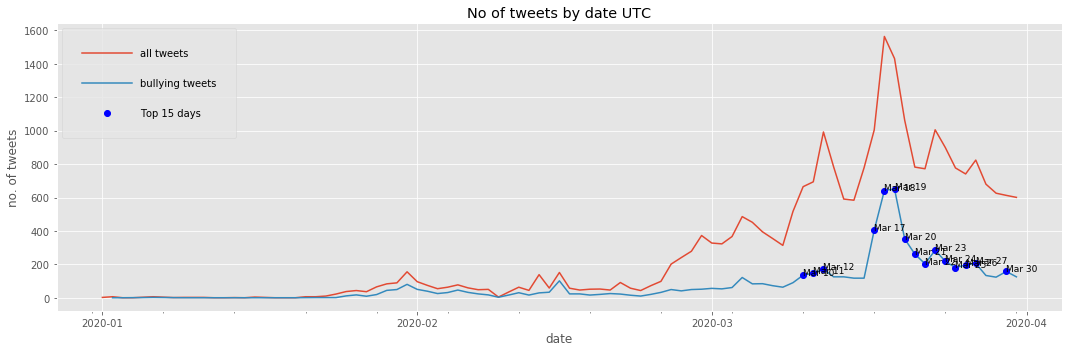

In [16]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

plt.plot(n_tweets_df, label='all tweets')
# plt.plot(n_tweets_geo, label='all tweets')
plt.plot(n_tweets, label='bullying tweets')
plt.plot(n_max, 'ro', c='b', label='Top 15 days')   
# align = ['left','right','right','left','left']
for i, txt in enumerate(x):
    text = ax.annotate(txt.strftime('%b %d'), (x[i], y[i]))#, ha=align[i], va='bottom', rotation=0)
    text.set_fontsize(9)

plt.xlabel("date")
plt.ylabel("no. of tweets")
plt.title("No of tweets by date UTC")
# plt.xticks()
plt.legend(loc='upper left', handlelength=5, prop={'size':10}, borderpad=2, labelspacing=2)

months = mdates.MonthLocator()  # every month
days = mdates.WeekdayLocator()  # every day
years_fmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_major_locator(months)
fig.tight_layout()
plt.savefig('pred_tweet.pdf', bbox_inches='tight')

In [17]:
role = b_trace.groupby(["date","bullying_role"]).count()['id'].unstack()
post_type = b_trace.groupby(["date","bullying_post_type"]).count()['id'].unstack()
form = b_trace.groupby(["date","form_of_bullying"]).count()['id'].unstack()

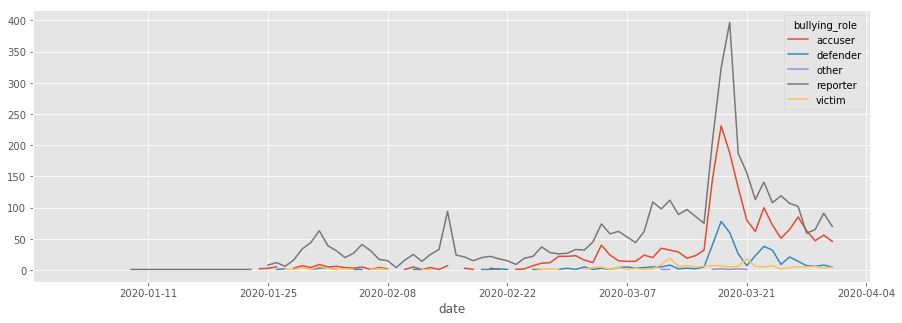

In [18]:
role.plot()
plt.savefig('role.pdf', bbox_inches='tight')

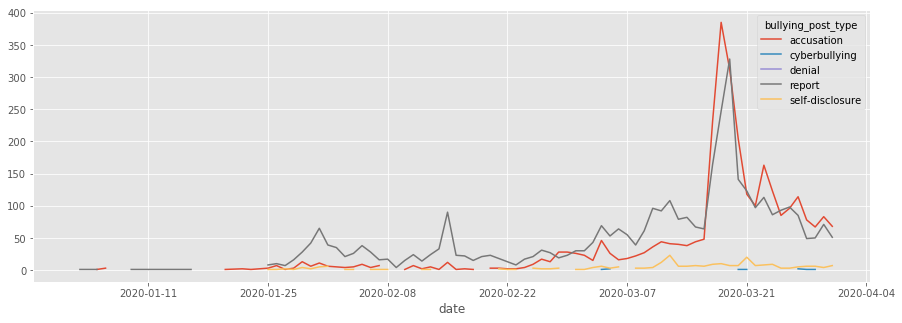

In [19]:
post_type.plot()
plt.savefig('post_type.pdf', bbox_inches='tight')

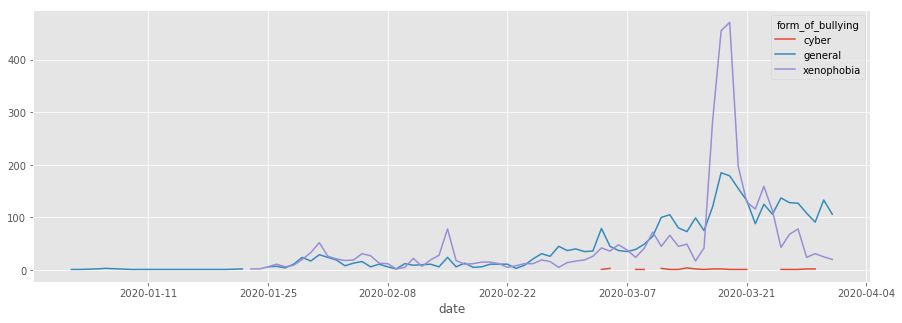

In [20]:
form.plot()
plt.savefig('form.pdf', bbox_inches='tight')